### Decision Tree Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import the data

In [2]:
df = pd.read_csv('banknotes.csv')

In [3]:
df.shape

(1372, 5)

In [4]:
list(df.columns)

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

In [5]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

#### Separate the input and output data

In [7]:
x = df.drop('Class', axis = 1) # df.iloc[:,:4]
y = df['Class']

In [8]:
list(x.columns)

['Variance', 'Skewness', 'Curtosis', 'Entropy']

In [9]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [10]:
import seaborn as sns

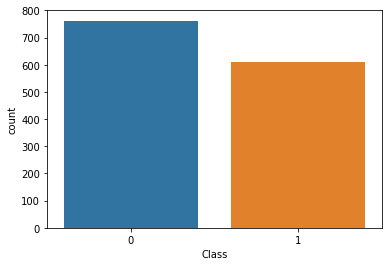

In [11]:
sns.countplot(x=y);

In [12]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

#### Explore the data

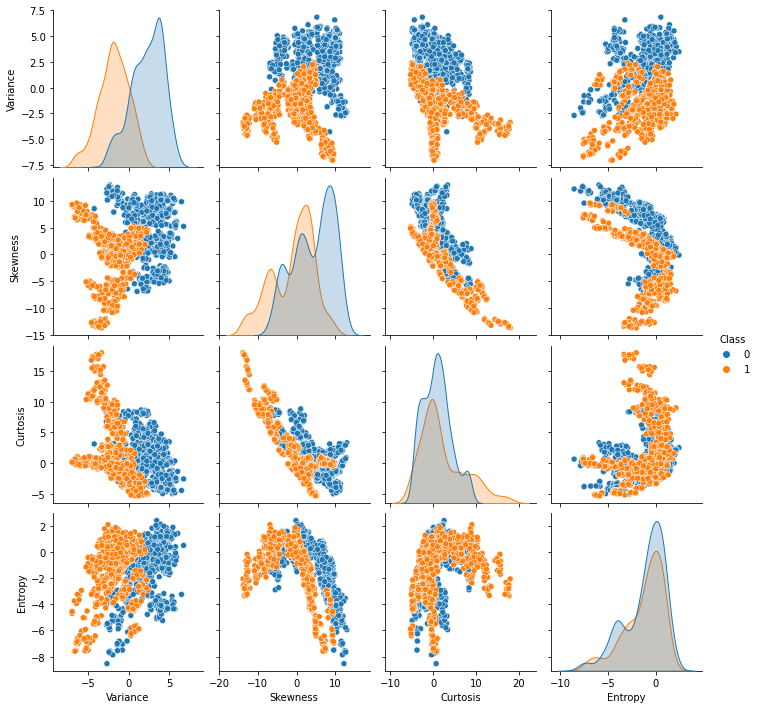

In [13]:
sns.pairplot(df, hue='Class')

#### Cross-Validation

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [16]:
x_train.shape

(1029, 4)

In [17]:
x_test.shape

(343, 4)

In [18]:
y_train

662     0
512     0
1193    1
682     0
1313    1
       ..
763     1
835     1
1216    1
559     0
684     0
Name: Class, Length: 1029, dtype: int64

#### Build the classification model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
classifier = DecisionTreeClassifier(random_state=0)

In [21]:
# train the algorithm
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Predictions on unseen / test data

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
y_test.value_counts()

0    195
1    148
Name: Class, dtype: int64

#### Evaluate the performance of algorithm

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test, y_pred)

array([[191,   4],
       [  3, 145]])

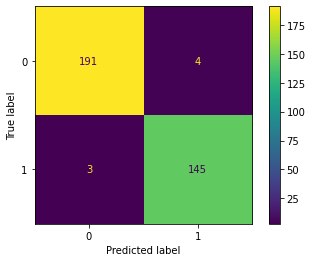

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



#### Plot the tree

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

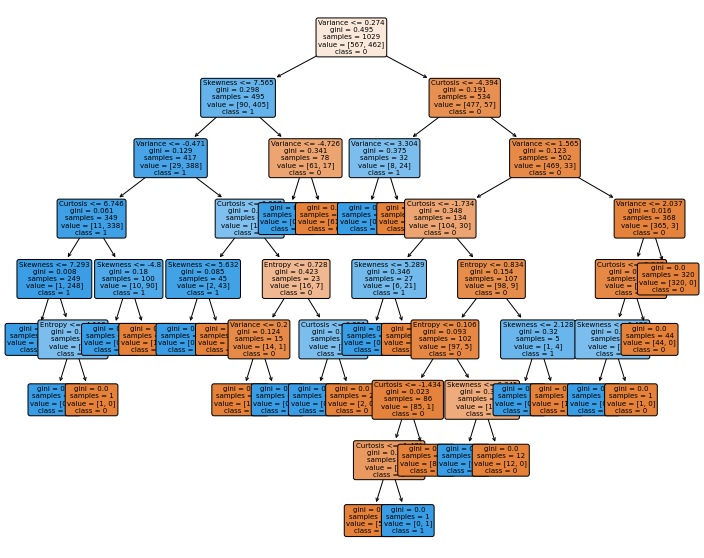

In [31]:
plt.figure(figsize=(12,10))
plot_tree(classifier, fontsize=7, filled=True,
         rounded=True, class_names=['0','1'],
         feature_names=x.columns);

#### Importance of features

In [32]:
imp = classifier.feature_importances_

<BarContainer object of 4 artists>

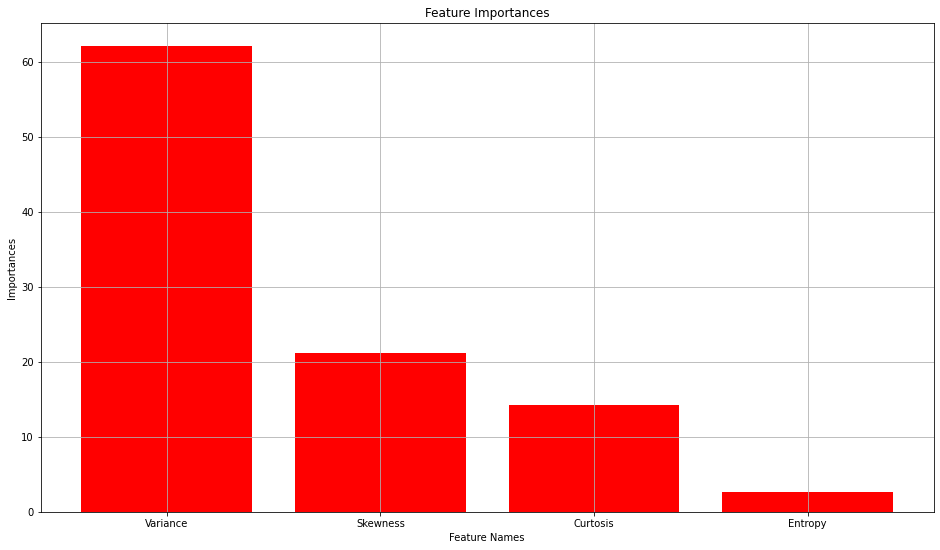

In [33]:
plt.figure(figsize=(16,9))
plt.title('Feature Importances')
plt.xlabel('Feature Names')
plt.ylabel('Importances')
plt.grid()
plt.bar(x.columns, imp*100, color='red')

In [34]:
new1 = [[3.45660, 9.52280, -4.0112, -3.59440]]
new2 = [[-2.54190, -0.65804, 2.6842, 1.19520]]
new3 = [[0.32924, -4.45520, 4.5718, -0.98880]]

In [35]:
classifier.predict(new1)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [36]:
classifier.predict(new2)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [37]:
classifier.predict(new3)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### Decision Tree Regression

#### Import the dataset

In [38]:
df = pd.read_csv('petrol_consumption.csv')

In [39]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


#### Check the correlation

In [40]:
df.corrwith(df['Petrol_Consumption'])

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
Petrol_Consumption              1.000000
dtype: float64

#### Separate the input and output variables

In [41]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [42]:
x = df.drop('Petrol_Consumption', axis = 1)
y = df['Petrol_Consumption']

In [43]:
x.shape

(48, 4)

#### Cross Validation

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [45]:
x_train.shape

(36, 4)

In [46]:
x_test.shape

(12, 4)

#### Build the Regressor model

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
regressor = DecisionTreeClassifier(random_state=0)

In [49]:
regressor.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Prediction on unseen data

In [50]:
y_pred = regressor.predict(x_test)

In [51]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [52]:
result

,Actual,Predicted
29,534,547
4,410,460
26,577,566
30,571,591
32,577,566
37,704,508
34,487,591
40,587,632
7,467,460
10,580,464


In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [54]:
mean_absolute_error(y_test, y_pred)

51.416666666666664

In [55]:
mean_absolute_percentage_error(y_test, y_pred)

0.09039258676463718

In [56]:
new1 = [[7.00, 4449, 4639, 0.626]]
new2 = [[9.00, 4476, 3942, 0.571]]

In [57]:
regressor.predict(new1)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([632])

In [58]:
regressor.predict(new2)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([510])

In [59]:
regressor.feature_importances_ * 100

array([10.06389776, 26.87813784, 29.69262972, 33.36533468])

### K-means Clustering

In [61]:
df = pd.read_csv('Mall_Customers.csv')

In [62]:
df.shape

(200, 5)

In [63]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Input variables

In [65]:
x = df.iloc[:,[3,4]]

In [66]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Visualize the data

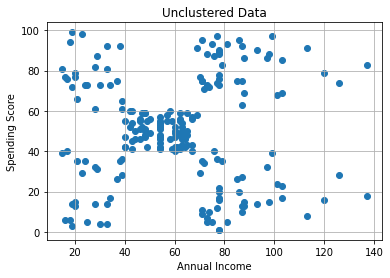

In [69]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1])

#### Find the SSE

In [71]:
from sklearn.cluster import KMeans

In [81]:
km = KMeans(n_clusters=7)

In [82]:
labels = km.fit_predict(x)

In [83]:
labels;

In [84]:
km.inertia_

30227.606513152015

#### Elbow Method

In [86]:
sse = []
for i in range(1,16):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    sse.append(km.inertia_)

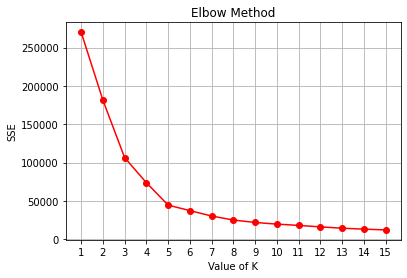

In [88]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='o',color='red')

#### Silhoutte Score

In [90]:
from sklearn.metrics import silhouette_score

In [92]:
silh = []
for i in range(2,16):
    km = KMeans(n_clusters=i)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

<BarContainer object of 14 artists>

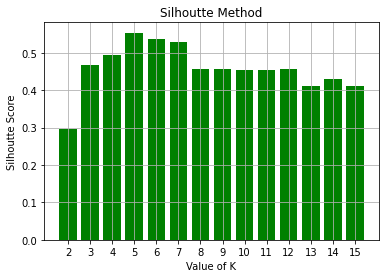

In [93]:
plt.title('Silhoutte Method')
plt.xlabel('Value of K')
plt.ylabel('Silhoutte Score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color='g')

#### Create the clusters

In [101]:
km = KMeans(n_clusters=5, random_state=0)

In [102]:
labels = km.fit_predict(x)

In [103]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [104]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [105]:
cent = km.cluster_centers_

In [106]:
cent

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

#### Visualize clustered data

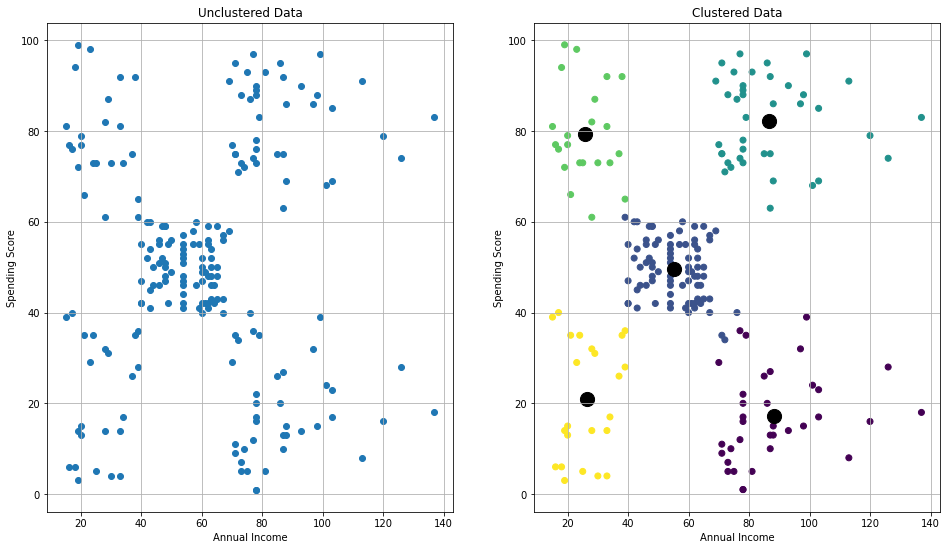

In [111]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1])

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1], c= labels)
plt.scatter(cent[:,0], cent[:,1], s=200, color='k')

In [112]:
three = df[labels == 3]

In [113]:
three

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


In [118]:
new1 = [[45, 89]]
new2 = [[93, 78]]
new3 = [[43, 56]]

In [119]:
km.predict(new1)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [121]:
km.predict(new2)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [122]:
km.predict(new3)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [123]:
df['label'] = labels

In [125]:
df;

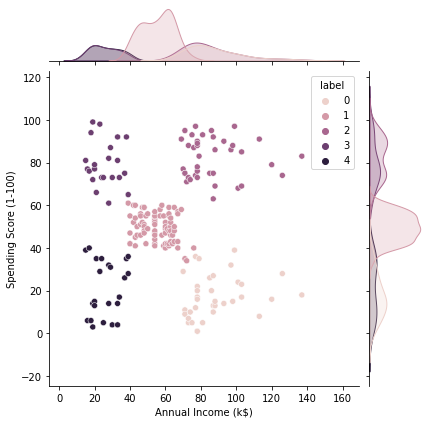

In [128]:
import seaborn as sns
sns.jointplot(x='Annual Income (k$)', 
              y='Spending Score (1-100)', 
              hue='label', data=df)